In [1]:
import requests
import json
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import pickle

## for geospatial
import folium
import geopy
#from mpl_toolkits.basemap import Basemap

## for machine learning
from sklearn import preprocessing, cluster

In [2]:
file_path = "combined_eq_california" + "_timeseries" + ".csv"

#Converting to time-series with respect to "time" column
df_eq = pd.read_csv(file_path, index_col=0)

df_eq["time"] = df_eq.index

df_eq.head(3)

,type,mag,place,status,tsunami,sig,net,nst,dmin,rms,gap,magType,longitude,latitude,depth,name,time
time,,,,,,,,,,,,,,,,,
1970-01-02 10:45:20.570,earthquake,3.14,"24km S of Santa Barbara, CA",reviewed,0,152,ci,11.000000,0.234700,0.590000,205.000000,ml,-119.695667,34.206000,6.000000,M: 3.14 / 1970-01-02 / 24km S of Santa Barbar...,1970-01-02 10:45:20.570
1970-01-02 21:47:53.740,earthquake,2.61,"12km NE of Inyokern, CA",reviewed,0,105,ci,6.000000,0.136800,0.730000,96.000000,ml,-117.733667,35.735167,1.650000,"M: 2.61 / 1970-01-02 / 12km NE of Inyokern, CA",1970-01-02 21:47:53.740
1970-01-03 02:51:58.400,earthquake,4.00,"San Francisco Bay area, California",reviewed,0,246,ushis,20.500989,0.198006,0.197771,121.016289,mb,-122.088000,37.298000,6.274206,"M: 4.0 / 1970-01-03 / San Francisco Bay area,...",1970-01-03 02:51:58.400


In [3]:
df_eq.info()

<class 'pandas.core.frame.DataFrame'>
Index: 313332 entries, 1970-01-02 10:45:20.570 to 2020-10-01 15:28:09.630
Data columns (total 17 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   type       313332 non-null  object 
 1   mag        313332 non-null  float64
 2   place      313332 non-null  object 
 3   status     313332 non-null  object 
 4   tsunami    313332 non-null  int64  
 5   sig        313332 non-null  int64  
 6   net        313332 non-null  object 
 7   nst        313332 non-null  float64
 8   dmin       313332 non-null  float64
 9   rms        313332 non-null  float64
 10  gap        313332 non-null  float64
 11  magType    313329 non-null  object 
 12  longitude  313332 non-null  float64
 13  latitude   313332 non-null  float64
 14  depth      313332 non-null  float64
 15  name       313332 non-null  object 
 16  time       313332 non-null  object 
dtypes: float64(8), int64(2), object(7)
memory usage: 43.0+ MB


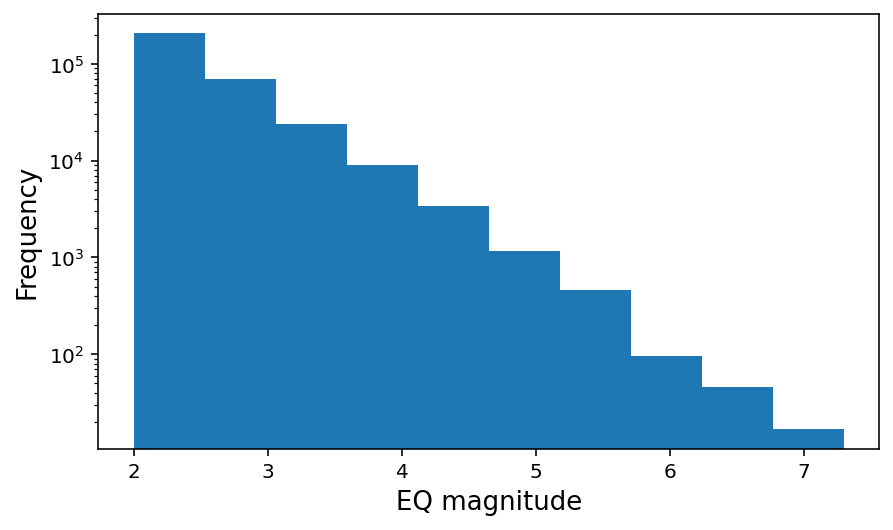

In [4]:
%config InlineBackend.figure_format = 'retina'


plt.figure(figsize = [7, 4])


plt.hist(np.array(df_eq.mag), log=True);
plt.xlabel("EQ magnitude", fontsize = 13);
plt.ylabel("Frequency", fontsize = 13);

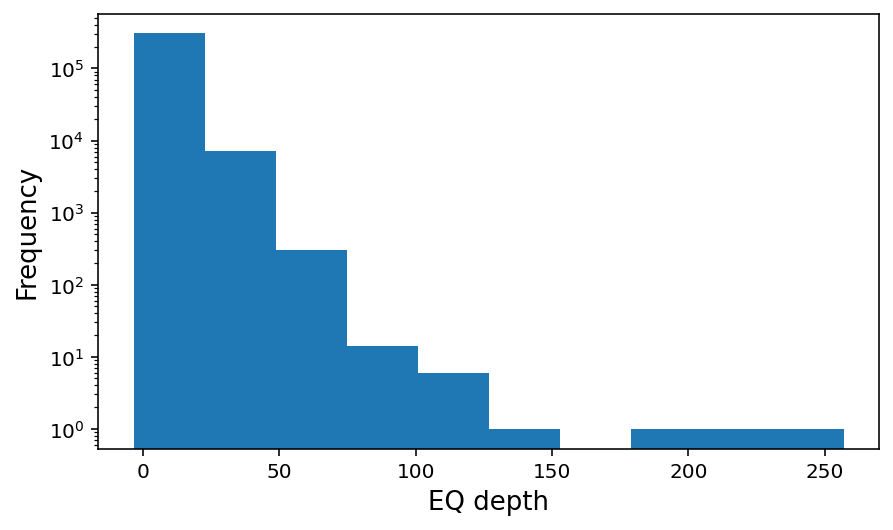

In [5]:
plt.figure(figsize = [7, 4])
plt.hist(np.array(df_eq.depth), log=True);
plt.xlabel("EQ depth", fontsize = 13);
plt.ylabel("Frequency", fontsize = 13);

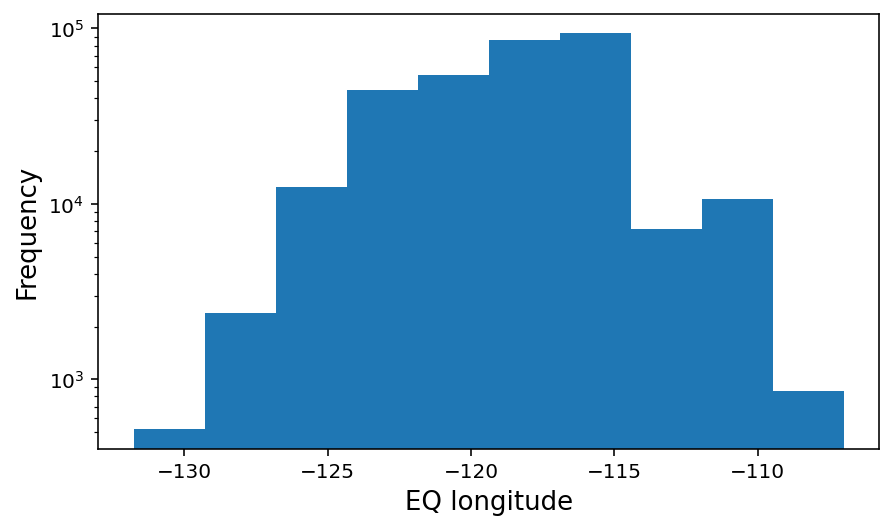

In [6]:
plt.figure(figsize = [7, 4])
plt.hist(np.array(df_eq.longitude), log=True);
plt.xlabel("EQ longitude", fontsize = 13);
plt.ylabel("Frequency", fontsize = 13);

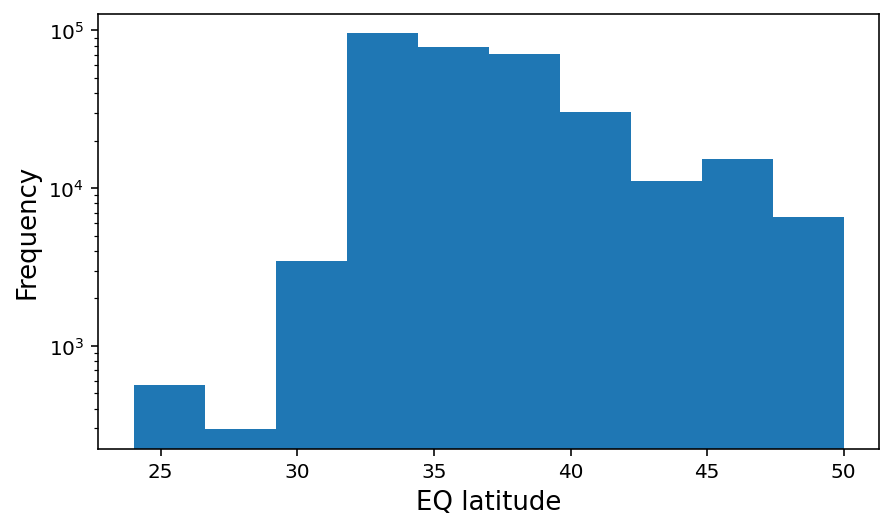

In [7]:
plt.figure(figsize = [7, 4])
plt.hist(np.array(df_eq.latitude), log=True);
plt.xlabel("EQ latitude", fontsize = 13);
plt.ylabel("Frequency", fontsize = 13);

In [8]:
df_eq_large = df_eq[df_eq["mag"]>6].copy()

# Fixing the time column datatype
df_eq_large["time"] = pd.to_datetime(df_eq_large["time"])

df_eq_large["time_diff_day"] = df_eq_large["time"].diff()

df_eq_large.head(5)
df_eq_large.tail(5)

,type,mag,place,status,tsunami,sig,net,nst,dmin,rms,gap,magType,longitude,latitude,depth,name,time,time_diff_day
time,,,,,,,,,,,,,,,,,,
2019-07-04 17:33:49.000,earthquake,6.4,Ridgecrest Earthquake Sequence,reviewed,1,1400,ci,62.000000,0.12330,0.1600,47.00,mw,-117.503833,35.705333,10.50,M: 6.4 / 2019-07-04 / Ridgecrest Earthquake S...,2019-07-04 17:33:49.000,255 days 11:11:00.880000
2019-07-06 03:19:53.040,earthquake,7.1,2019 Ridgecrest Earthquake Sequence,reviewed,1,1596,ci,77.000000,0.04616,0.2200,43.00,mw,-117.599333,35.769500,8.00,M: 7.1 / 2019-07-06 / 2019 Ridgecrest Earthqu...,2019-07-06 03:19:53.040,1 days 09:46:04.040000
2019-08-29 15:07:58.646,earthquake,6.3,"285km W of Bandon, Oregon",reviewed,1,1009,us,20.500989,2.67800,1.1700,31.00,mww,-127.881700,43.542500,10.00,"M: 6.3 / 2019-08-29 / 285km W of Bandon, Oregon",2019-08-29 15:07:58.646,54 days 11:48:05.606000
2020-03-31 23:52:30.781,earthquake,6.5,"70km W of Challis, Idaho",reviewed,0,1410,us,20.500989,0.88500,0.6600,31.00,mww,-115.117500,44.464600,12.06,"M: 6.5 / 2020-03-31 / 70km W of Challis, Idaho",2020-03-31 23:52:30.781,215 days 08:44:32.135000
2020-05-15 11:03:27.176,earthquake,6.5,"Monte Cristo Range, NV Earthquake",reviewed,0,1320,nn,27.000000,0.35700,0.2669,55.79,ml,-117.849700,38.168900,2.70,"M: 6.5 / 2020-05-15 / Monte Cristo Range, NV ...",2020-05-15 11:03:27.176,44 days 11:10:56.395000


In [9]:
df_eq_large.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, 1971-02-09 14:00:41.920 to 2020-05-15 11:03:27.176
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   type           85 non-null     object         
 1   mag            85 non-null     float64        
 2   place          85 non-null     object         
 3   status         85 non-null     object         
 4   tsunami        85 non-null     int64          
 5   sig            85 non-null     int64          
 6   net            85 non-null     object         
 7   nst            85 non-null     float64        
 8   dmin           85 non-null     float64        
 9   rms            85 non-null     float64        
 10  gap            85 non-null     float64        
 11  magType        85 non-null     object         
 12  longitude      85 non-null     float64        
 13  latitude       85 non-null     float64        
 14  depth          85 non-

In [10]:
len(df_eq_large)

85

In [11]:
df_eq_large["time_diff_day"].describe()

count                             84
mean     214 days 04:49:19.110190472
std      221 days 14:37:43.431974964
min                  0 days 00:00:18
25%          44 days 19:11:41.638750
50%         150 days 23:23:51.150000
75%         302 days 17:09:17.627500
max        1104 days 13:33:35.280000
Name: time_diff_day, dtype: object

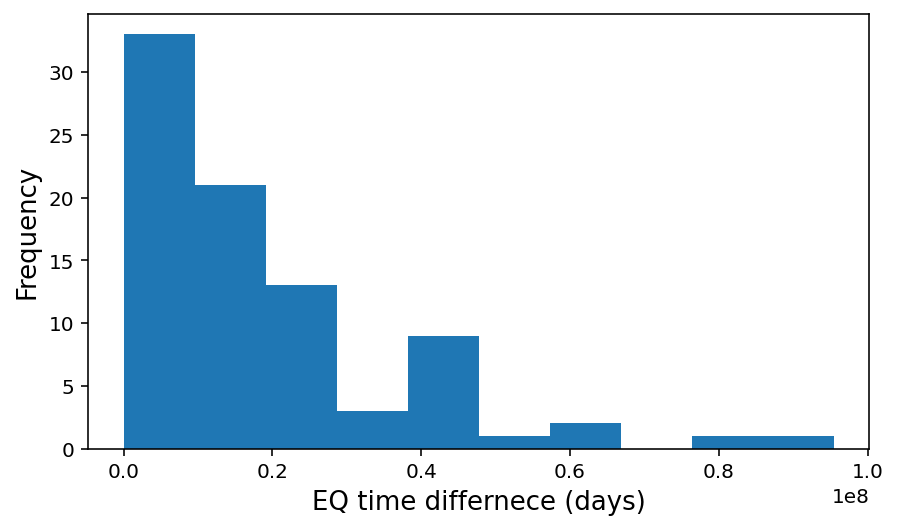

In [12]:
plt.figure(figsize = [7, 4])
df_eq_large["time_diff_day"].astype('timedelta64[s]').plot.hist()

plt.xlabel("EQ time differnece (days)", fontsize = 13);
plt.ylabel("Frequency", fontsize = 13);

Text(0, 0.5, 'Magnitude')

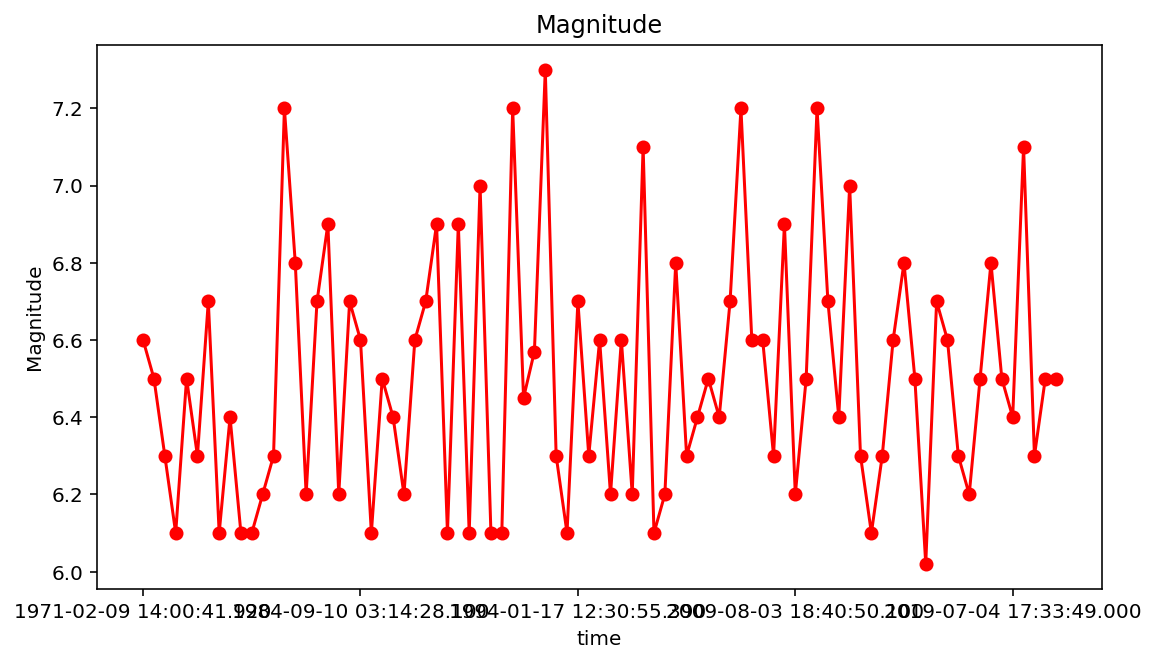

In [13]:
%config InlineBackend.figure_format = 'retina'


# Pandas series with magnitudes greater than 6
plt.figure(figsize=(9,5))
df_eq_large["mag"].plot(style="ro-")

plt.title("Magnitude")
plt.ylabel("Magnitude")

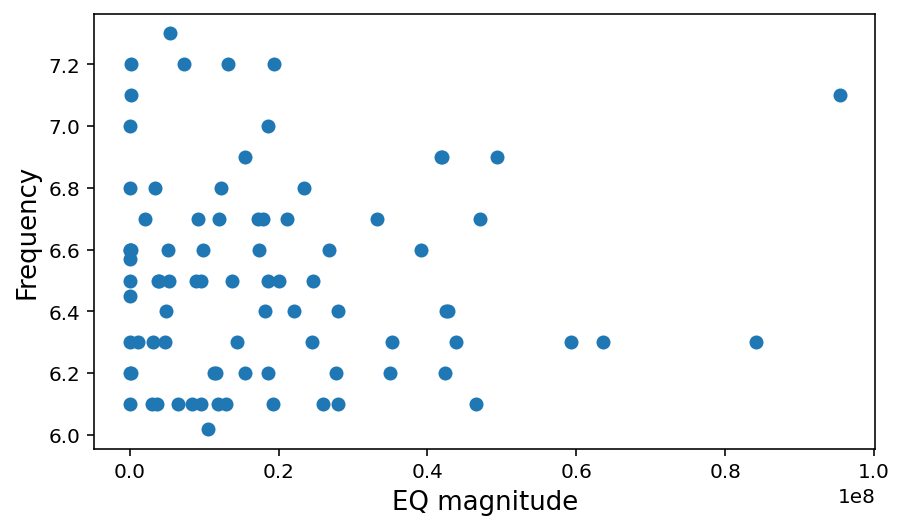

In [14]:
%config InlineBackend.figure_format = 'retina'


plt.figure(figsize = [7, 4])


plt.scatter(df_eq_large["time_diff_day"].astype('timedelta64[s]'),
            df_eq_large.mag)

plt.xlabel("EQ magnitude", fontsize = 13);
plt.ylabel("Frequency", fontsize = 13);

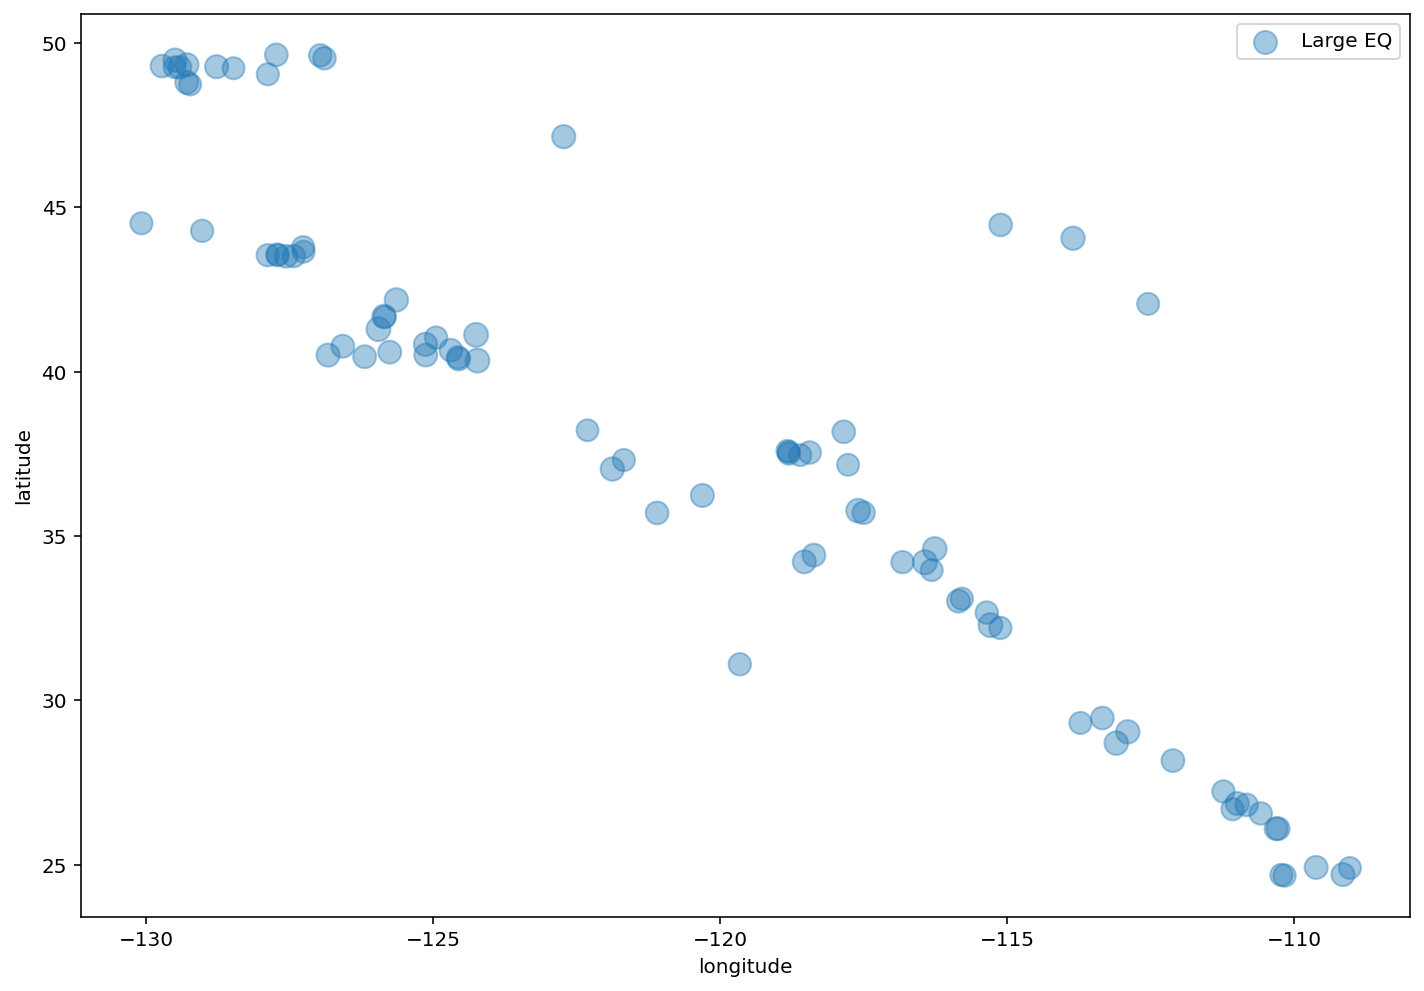

In [15]:
ax = plt.gca()

df_eq_large.plot(kind="scatter", x="longitude", y="latitude",
    s=df_eq_large['mag']/0.05, label="Large EQ",
    alpha=0.4, figsize=(10,7), ax = ax
)
plt.legend()

plt.tight_layout()

In [16]:
type(list(pd.to_datetime(df_eq_large.index))[0].date())

datetime.date

In [17]:
city = "California"

locator = geopy.geocoders.Nominatim(user_agent="MyCoder")
location = locator.geocode(city)
print(location)

location = [location.latitude, location.longitude]
print("[lat, long]:", location)

x, y = "latitude", "longitude"
color = "time"
size = "mag"
popup = "name"
data = df_eq_large.copy()


lst_colors=["black"]
data["color"] = "black"
lst_elements = sorted(list(data["color"].unique()))


scaler = preprocessing.MinMaxScaler(feature_range=(3,15))
data["size"] = scaler.fit_transform(
               data[size].values.reshape(-1,1)).reshape(-1)

map_ = folium.Map(location=location, tiles="cartodbpositron",
                  zoom_start=7)

data.apply(lambda row: folium.CircleMarker(
           location=[row[x],row[y]], popup=row[popup],
           color=row["color"], fill=True,
           radius=row["size"]).add_to(map_), axis=1)

legend_html = """<div style="position:fixed; bottom:10px; left:10px; border:2px solid black; z-index:9999; font-size:14px;">&nbsp;<b>"""+color+""":</b><br>"""
for i in lst_elements:
     legend_html = legend_html+"""&nbsp;<i class="fa fa-circle 
     fa-1x" style="color:"""+lst_colors[lst_elements.index(i)]+"""">
     </i>&nbsp;"""+str(i)+"""<br>"""
legend_html = legend_html+"""</div>"""
map_.get_root().html.add_child(folium.Element(legend_html))

map_

California, United States
[lat, long]: [36.7014631, -118.755997]


In [18]:
df_eq_lp = df_eq['1989-09-19':'1989-10-19']

df_eq_lp.head()

,type,mag,place,status,tsunami,sig,net,nst,dmin,rms,gap,magType,longitude,latitude,depth,name,time
time,,,,,,,,,,,,,,,,,
1989-09-19 02:49:47.290,earthquake,2.30,"17km E of Desert Hot Springs, CA",reviewed,0,81,ci,0.000000,0.198006,0.054,70.000000,mc,-116.316,33.971,7.935,M: 2.3 / 1989-09-19 / 17km E of Desert Hot Sp...,1989-09-19 02:49:47.290
1989-09-19 03:03:33.230,earthquake,2.79,"12km ESE of Anza, CA",reviewed,0,120,ci,0.000000,0.198006,0.109,39.800000,ml,-116.557,33.517,12.388,"M: 2.79 / 1989-09-19 / 12km ESE of Anza, CA",1989-09-19 03:03:33.230
1989-09-19 09:46:00.790,earthquake,3.70,Arizona,reviewed,0,211,us,20.500989,0.198006,0.700,121.016289,ml,-112.407,36.663,5.000,M: 3.7 / 1989-09-19 / Arizona,1989-09-19 09:46:00.790
1989-09-19 16:29:32.540,earthquake,2.25,"15km S of Las Flores, CA",reviewed,0,78,ci,0.000000,0.198006,0.132,126.900000,mc,-118.616,33.902,11.117,"M: 2.25 / 1989-09-19 / 15km S of Las Flores, CA",1989-09-19 16:29:32.540
1989-09-19 17:46:55.920,earthquake,2.61,"48km ENE of San Clemente Is. (SE tip), CA",reviewed,0,105,ci,0.000000,0.198006,0.241,199.700000,mc,-117.909,33.040,5.633,M: 2.61 / 1989-09-19 / 48km ENE of San Clemen...,1989-09-19 17:46:55.920


In [19]:
city = "California"

locator = geopy.geocoders.Nominatim(user_agent="MyCoder")
location = locator.geocode(city)
print(location)

location = [location.latitude, location.longitude]
print("[lat, long]:", location)

x, y = "latitude", "longitude"
color = "time"
size = "mag"
popup = "name"
data = df_eq_lp.copy()


lst_colors=["black"]
data["color"] = "black"
lst_elements = sorted(list(data["color"].unique()))


scaler = preprocessing.MinMaxScaler(feature_range=(3,15))
data["size"] = scaler.fit_transform(
               data[size].values.reshape(-1,1)).reshape(-1)

map_ = folium.Map(location=location, tiles="cartodbpositron",
                  zoom_start=7)

data.apply(lambda row: folium.CircleMarker(
           location=[row[x],row[y]], popup=row[popup],
           color=row["color"], fill=True,
           radius=row["size"]).add_to(map_), axis=1)

legend_html = """<div style="position:fixed; bottom:10px; left:10px; border:2px solid black; z-index:9999; font-size:14px;">&nbsp;<b>"""+color+""":</b><br>"""
for i in lst_elements:
     legend_html = legend_html+"""&nbsp;<i class="fa fa-circle 
     fa-1x" style="color:"""+lst_colors[lst_elements.index(i)]+"""">
     </i>&nbsp;"""+str(i)+"""<br>"""
legend_html = legend_html+"""</div>"""
map_.get_root().html.add_child(folium.Element(legend_html))

map_


California, United States
[lat, long]: [36.7014631, -118.755997]


Text(0, 0.5, 'Magnitude')

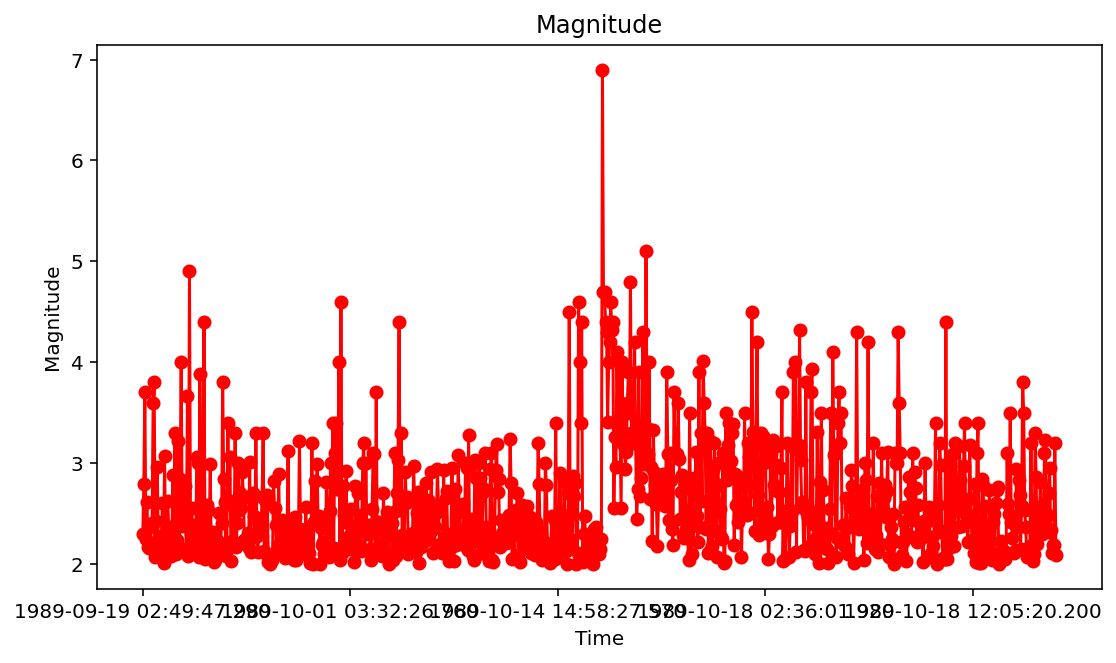

In [20]:
%config InlineBackend.figure_format = 'retina'

plt.figure(figsize=(9,5))
df_eq_lp["mag"].plot(style="ro-")

plt.title("Magnitude")
plt.xlabel('Time')
plt.ylabel("Magnitude")

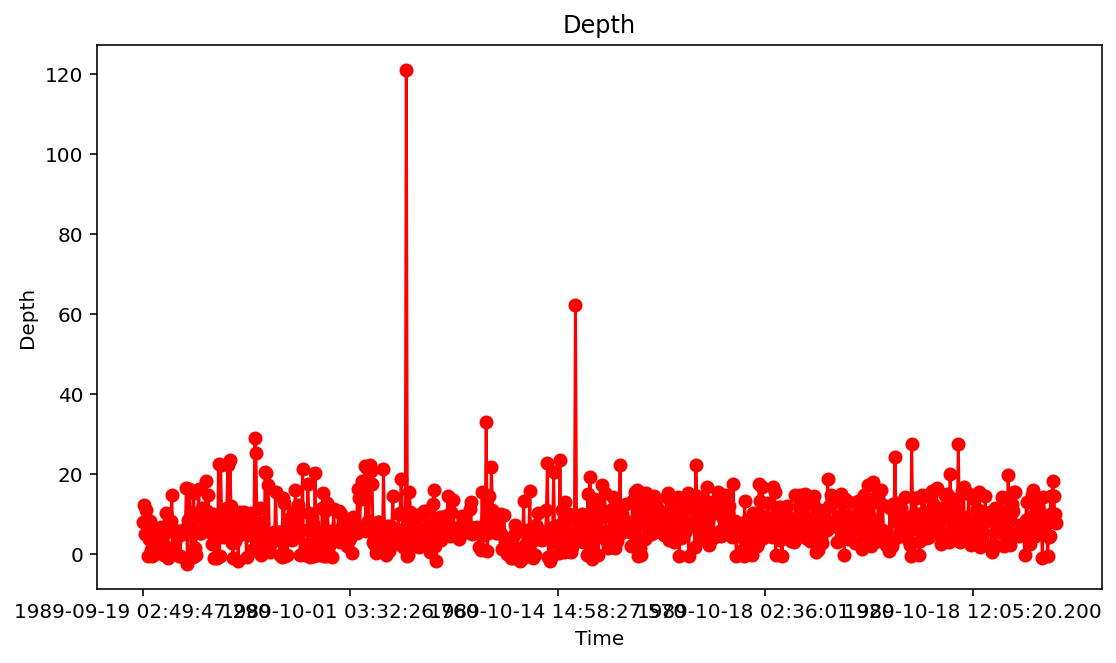

In [21]:
%config InlineBackend.figure_format = 'retina'

plt.figure(figsize=(9,5))
df_eq_lp["depth"].plot(style="ro-")

plt.title("Depth")
plt.xlabel('Time')
plt.ylabel("Depth");

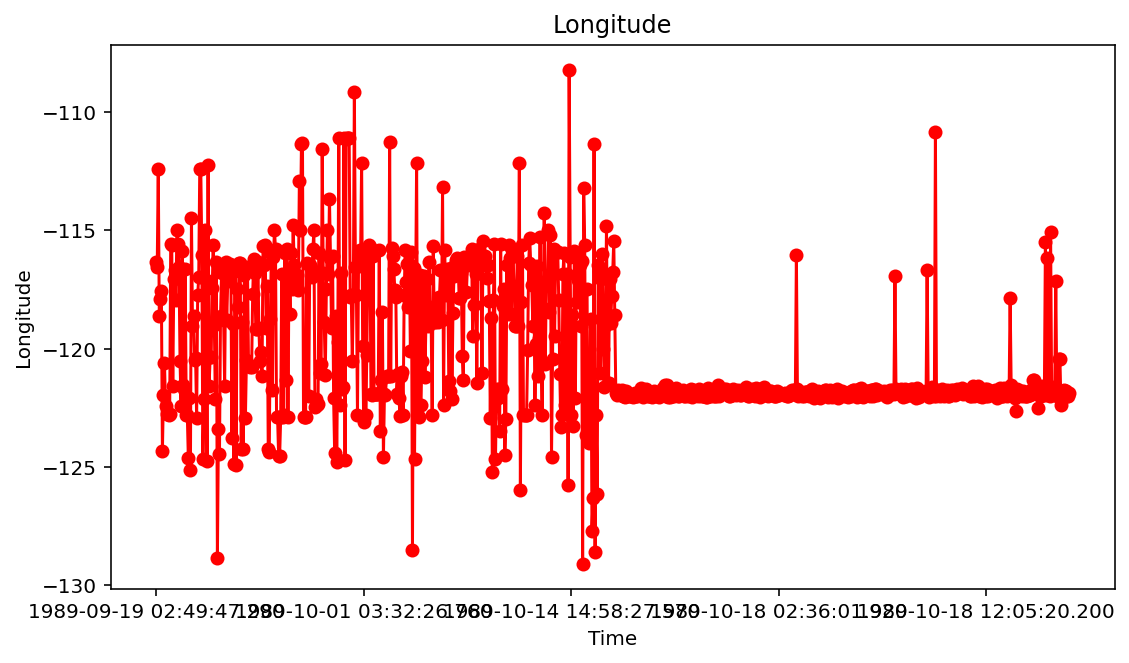

In [22]:
%config InlineBackend.figure_format = 'retina'

plt.figure(figsize=(9,5))
df_eq_lp["longitude"].plot(style="ro-")

plt.title("Longitude")
plt.xlabel('Time')
plt.ylabel("Longitude");

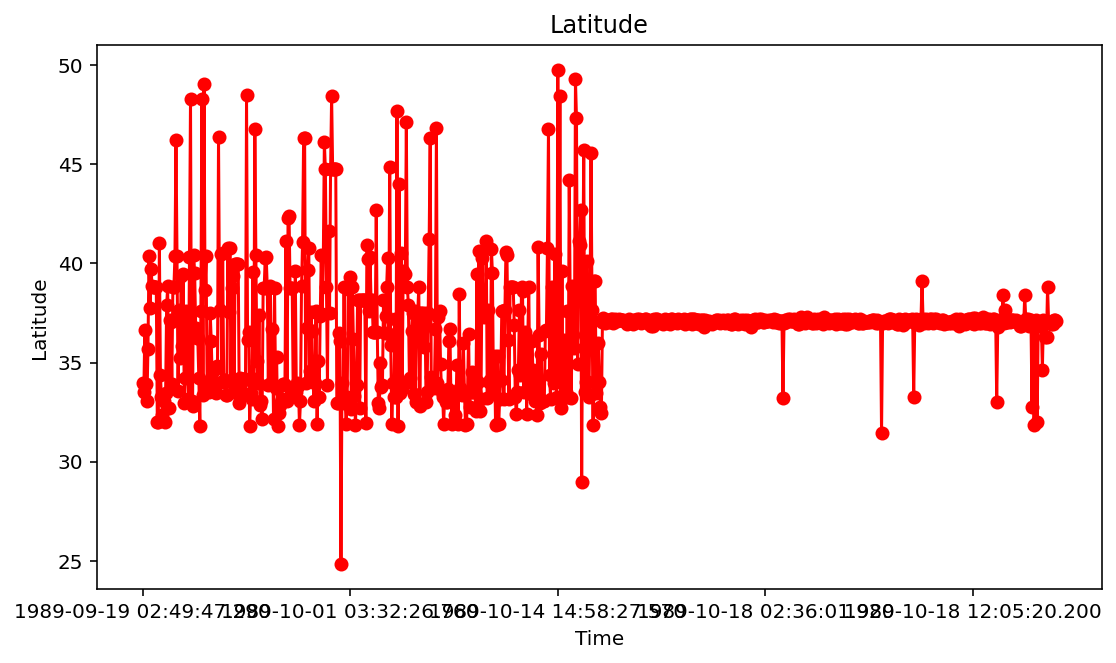

In [23]:
%config InlineBackend.figure_format = 'retina'

plt.figure(figsize=(9,5))
df_eq_lp["latitude"].plot(style="ro-")

plt.title("Latitude")
plt.xlabel('Time')
plt.ylabel("Latitude");

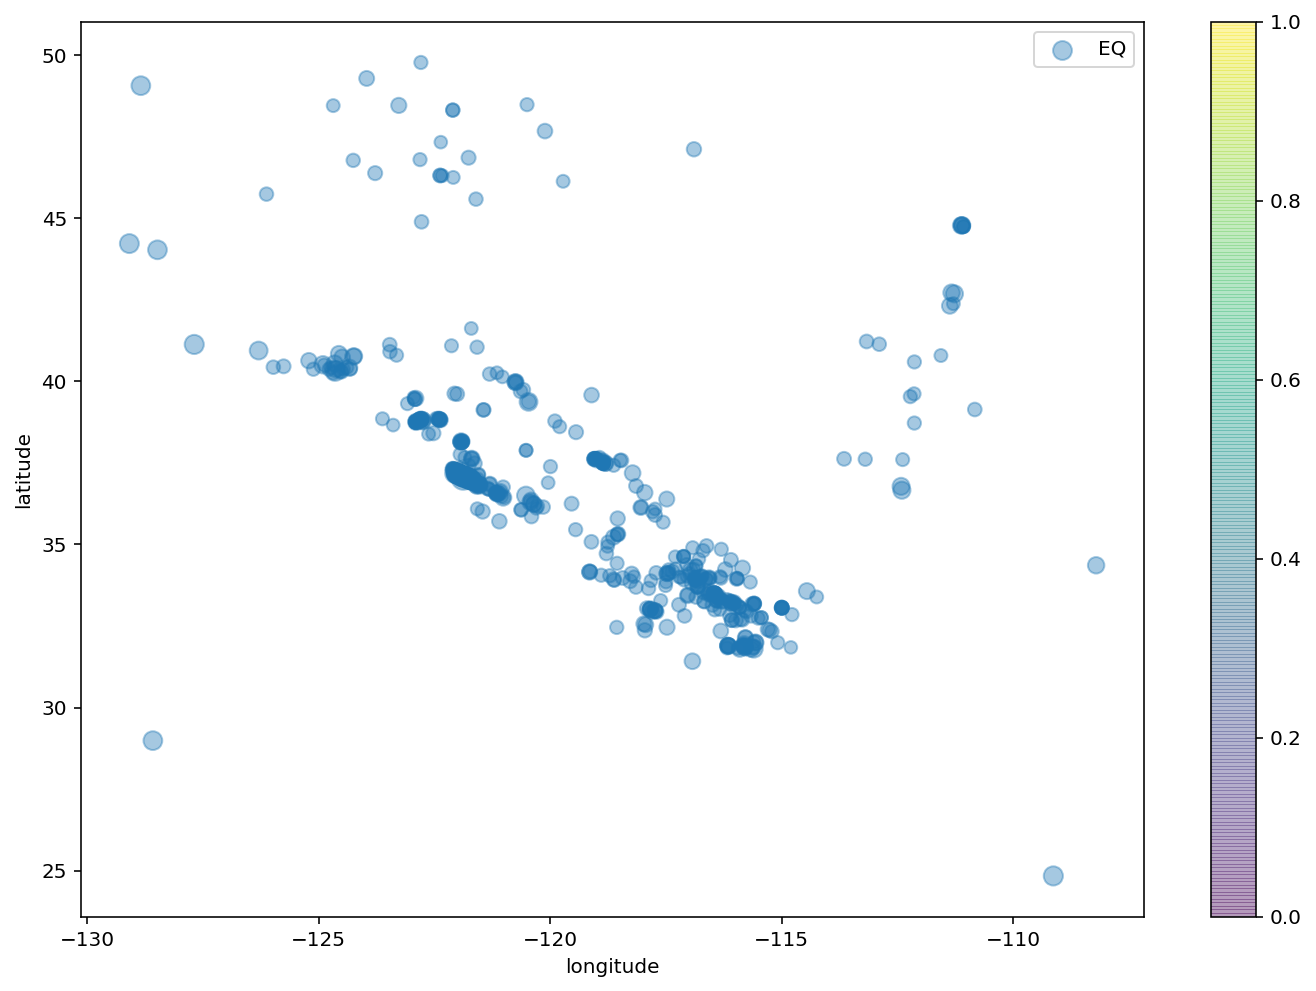

In [24]:
ax = plt.gca()

df_eq_lp.plot(kind="scatter", x="longitude", y="latitude",
    s=df_eq_lp['mag']/0.05, label="EQ",

    colorbar=True, alpha=0.4, figsize=(10,7), ax = ax
)
plt.legend()

plt.tight_layout()